In [1]:
import ldd
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy

[2.45+/-3.128327908067346e-16]
[1.0+/-0.05772300254584061 1.0612244897959184+/-0.059516270480287375
 1.9428571428571426+/-0.08918805273468869
 2.122448979591837+/-0.09576444159065631
 3.020408163265306+/-0.12986306485946408
 4.489795918367347+/-0.18774741505376863]
[2.45+/-0.1 2.6+/-0.1 4.76+/-0.1 5.2+/-0.1 7.4+/-0.1 11.0+/-0.1]


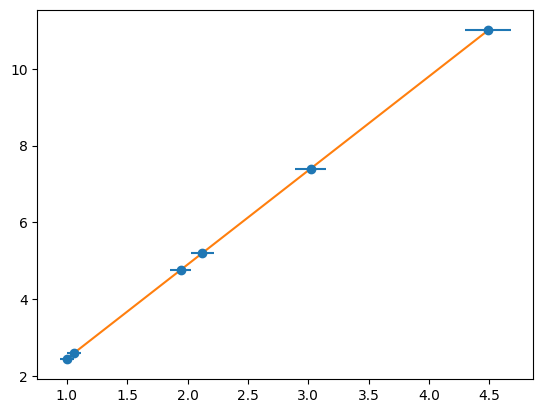

In [13]:
err = 0.1
position_emetteur = ufloat(0, std_dev=0)

# Protocole 1
position_recepteur_1 = unumpy.uarray([2.45, 5.2, 7.4], std_devs=err)

# Protocole 2
position_recepteur_fixe = ufloat(0, std_dev=0)
position_recepteur_mobile = unumpy.uarray([2.6, 4.76, 11], std_devs=err)

# Script
distance_protocole_1 = np.abs(position_recepteur_1 - position_emetteur)
distance_protocole_2 = np.abs(position_recepteur_fixe - position_recepteur_mobile)

distance = np.concatenate((distance_protocole_1, distance_protocole_2))
distance = np.sort(distance)

n = distance / ufloat(np.min(distance).nominal_value, std_dev=err)

ldd.plot_error(n, distance, label="Valeurs expérimentales", fmt="o")

(a) = ldd.odr_fit(ldd.linear_function, n, distance, p0=[1])
print(a)

ldd.plot(n, ldd.linear_function([a], n))

print(n)
print(distance)